<a href="https://colab.research.google.com/github/serverf21/hello-world/blob/master/EXL_assignment_SarvagyaSaxena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify_tracks_metadata.csv to spotify_tracks_metadata (4).csv


In [ ]:
import io
data=pd.read_csv(io.BytesIO(uploaded['spotify_tracks_metadata.csv']))

In [ ]:
data.head()

,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,valence
0,433759,1jnGFyaGAExn1eMEce83F9,Xweşkamın,Ömer Dayar,0,28-11-2001,2001.0,11.0,0.0401,0.661,440480,0.967,0.314000,3,0.0800,-7.608,0,False,0.0504,146.015,4,170,0.9630
1,433760,1TxqNnLIOhCF0WBwdYPjqw,Xwezi,Emrah Renas,0,30-05-2019,2019.0,5.0,0.7660,0.681,243508,0.463,0.000000,7,0.4930,-12.516,0,False,0.0388,115.993,5,170,0.5460
2,433761,3MAAgqn1g9FLuOSYXfKKY0,Xwhy,Grand Ephemeris,0,01-08-2014,2014.0,8.0,0.4710,0.374,241200,0.370,0.009470,9,0.0851,-8.295,1,False,0.0280,114.693,4,170,0.0421
3,433762,6xAE8mmAnvQiGApA3lSBl6,Buhar Xweşe,Koma Delal,0,04-12-2019,2019.0,12.0,0.7160,0.559,248546,0.582,0.000070,9,0.1780,-6.565,0,False,0.0630,159.975,4,170,0.8090
4,433763,1n9fQU25SJUawdykCNC04Y,Cendi Xweshike,Lorens Amude,0,07-03-2021,2021.0,3.0,0.0347,0.685,296571,0.612,0.000035,8,0.0858,-8.361,1,False,0.0825,140.019,4,170,0.7650


In [ ]:
data.describe()

,Unnamed: 0,song_popularity,album_release_year,album_release_month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,total_available_markets,valence
count,157808.000000,157808.000000,157766.000000,155147.000000,157808.000000,157808.000000,1.578080e+05,157808.000000,157808.000000,157808.000000,157808.000000,157808.000000,157808.000000,157808.000000,157808.000000,157808.000000,157808.000000,157808.000000
mean,289185.445149,13.401830,2015.442656,6.040465,0.340995,0.614562,2.149388e+05,0.571874,0.219155,5.282831,0.209090,-10.475117,0.578304,0.202335,119.019872,3.865431,161.294136,0.469269
std,129053.133042,15.267164,19.279730,3.685797,0.325666,0.182484,1.369248e+05,0.251380,0.357009,3.626208,0.178251,5.952353,0.493832,0.261354,30.541189,0.586151,31.688559,0.255456
min,98815.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.864000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,138266.750000,0.000000,2014.000000,3.000000,0.038300,0.511000,1.486630e+05,0.392000,0.000000,2.000000,0.098800,-13.134000,0.000000,0.042900,95.033000,4.000000,169.000000,0.266000
50%,360988.500000,3.000000,2019.000000,6.000000,0.235000,0.648000,1.971120e+05,0.590000,0.000048,5.000000,0.131000,-8.994000,1.000000,0.075000,120.017000,4.000000,170.000000,0.466000
75%,400440.250000,31.000000,2020.000000,9.000000,0.606000,0.744000,2.496682e+05,0.775000,0.421000,9.000000,0.271000,-6.350000,1.000000,0.255000,138.929250,4.000000,170.000000,0.668000
max,439892.000000,37.000000,2021.000000,12.000000,0.996000,0.994000,5.903468e+06,1.000000,1.000000,11.000000,1.000000,5.285000,1.000000,0.971000,248.038000,5.000000,170.000000,1.000000


In [ ]:
print(data.keys())

Index(['Unnamed: 0', 'spotify_id', 'song_name', 'artist_name',
       'song_popularity', 'album_release_date', 'album_release_year',
       'album_release_month', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'song_explicit', 'speechiness', 'tempo', 'time_signature',
       'total_available_markets', 'valence'],
      dtype='object')


In [ ]:
#checking for null entities (if present)
pd.isnull(data).sum()

Unnamed: 0                    0
spotify_id                    0
song_name                     0
artist_name                   0
song_popularity               0
album_release_date            0
album_release_year           42
album_release_month        2661
acousticness                  0
danceability                  0
duration_ms                   0
energy                        0
instrumentalness              0
key                           0
liveness                      0
loudness                      0
mode                          0
song_explicit                 0
speechiness                   0
tempo                         0
time_signature                0
total_available_markets       0
valence                       0
dtype: int64

Text(0.5, 1.0, 'Song Popularity Distribution')

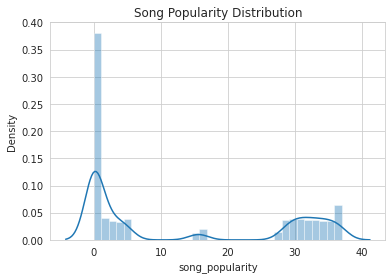

In [ ]:
#album_release_year and album_release_month are having null values
#We need to fill the null values while applying the predictive model
#Let us first understand the variables having strongets correlation with "Song Popularity"
sns.distplot(data['song_popularity']).set_title('Song Popularity Distribution')

In [ ]:
data.corr()

,Unnamed: 0,song_popularity,album_release_year,album_release_month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,valence
Unnamed: 0,1.000000,-0.993879,0.058859,-0.042988,0.035067,-0.006304,0.056851,-0.105593,0.096422,0.003326,-0.074871,-0.123303,0.024154,0.059326,0.021386,0.010736,-0.026358,0.095458,-0.043490
song_popularity,-0.993879,1.000000,-0.057667,0.041391,-0.040109,0.008050,-0.056271,0.108319,-0.093077,-0.003347,0.072868,0.126644,-0.024986,-0.054639,-0.025748,-0.009358,0.028938,-0.090324,0.040034
album_release_year,0.058859,-0.057667,1.000000,0.008240,-0.049215,0.056307,-0.034344,0.011626,0.015205,0.001757,-0.038342,0.014333,-0.018549,0.078290,0.010691,0.014559,0.017708,0.027183,-0.034865
album_release_month,-0.042988,0.041391,0.008240,1.000000,-0.052524,0.028345,0.005718,0.058046,0.012714,0.001942,-0.013882,0.062719,-0.009639,0.058060,-0.052767,0.011179,0.015946,0.071342,-0.012974
acousticness,0.035067,-0.040109,-0.049215,-0.052524,1.000000,-0.292130,-0.068553,-0.611744,0.081177,-0.019684,0.009158,-0.497477,0.029383,-0.158056,0.118664,-0.198371,-0.147619,-0.068571,-0.100938
danceability,-0.006304,0.008050,0.056307,0.028345,-0.292130,1.000000,-0.092995,0.168398,-0.231934,0.021799,-0.121052,0.268833,-0.042216,0.254669,0.210696,0.063769,0.194526,0.031806,0.400045
duration_ms,0.056851,-0.056271,-0.034344,0.005718,-0.068553,-0.092995,1.000000,0.091776,0.126486,0.008141,-0.042169,0.067052,-0.015363,-0.115785,-0.197237,0.045866,0.061866,0.031957,-0.095643
energy,-0.105593,0.108319,0.011626,0.058046,-0.611744,0.168398,0.091776,1.000000,-0.150311,0.034735,0.149831,0.771650,-0.038656,0.074868,-0.173437,0.201319,0.162953,0.000595,0.275457
instrumentalness,0.096422,-0.093077,0.015205,0.012714,0.081177,-0.231934,0.126486,-0.150311,1.000000,-0.011027,-0.123432,-0.324421,0.006174,-0.266439,-0.298653,0.008749,-0.031428,0.077772,-0.280884
key,0.003326,-0.003347,0.001757,0.001942,-0.019684,0.021799,0.008141,0.034735,-0.011027,1.000000,0.003365,0.020699,-0.213915,-0.000735,0.018703,0.000706,0.006214,0.007860,0.030959


Text(0.5, 1.0, 'Popularity Based on Time Signature')

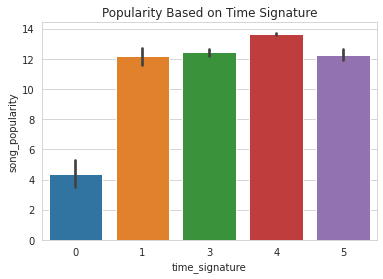

In [ ]:
#Let us check the correlation of song_popularity with different independent variables
# No1: song_popularity vs time_signature
sns.barplot(x = 'time_signature', y = 'song_popularity', data = data)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

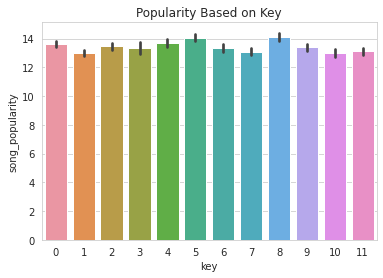

In [ ]:
#No2: key
sns.barplot(x = 'key', y = 'song_popularity', data = data)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

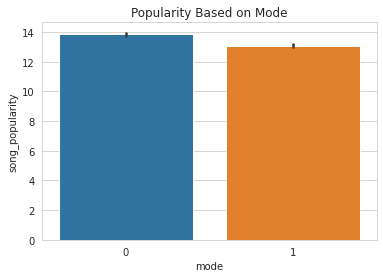

In [ ]:

#No3: Mode
sns.barplot(x = 'mode', y = 'song_popularity', data = data)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

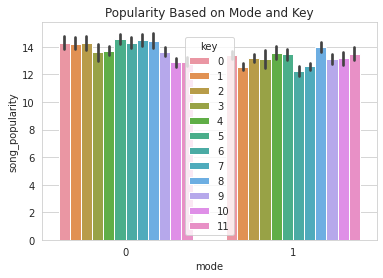

In [ ]:
#Popularity at mode 0 is slightly higher than 1
#Since mode and key of a song are related, we should check the impact of mode+key on song popularity
#No4: Key+Mode
sns.barplot(x = 'mode', y = 'song_popularity', hue = 'key', data = data)
plt.title('Popularity Based on Mode and Key')

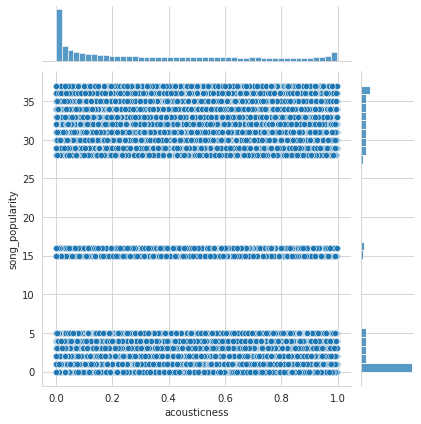

In [ ]:
#No5: Acousticness
sns.jointplot(x = 'acousticness', y = 'song_popularity', data = data)

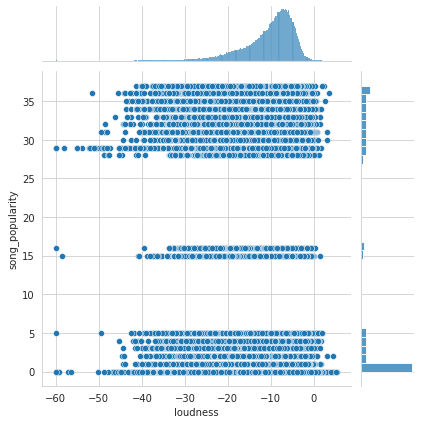

In [ ]:
#Although no major effect at higher acousticness, at lower acousticness, song_popularity increases significantly with decrease in acousticness
#In addition to this, it looks like at higher song_popularity, acousticness is having a greater impact
#No6: Loudness
sns.jointplot(x = 'loudness', y = 'song_popularity', data = data)

Text(0.5, 1.0, 'Acoustiness for Songs with More than 20 Popularity')

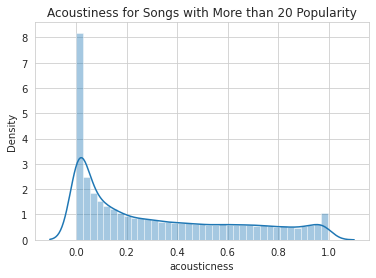

In [ ]:
#song_popularity is observed to be higher at higher loudness
#Since acousticness had a greater impact at higher song_popularity, let us validate this by checking only the entities with popularity>50
#No7
popular_above_20 = data[data.song_popularity > 20]
sns.distplot(popular_above_20['acousticness'])
plt.title('Acoustiness for Songs with More than 20 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 20 Popularity')

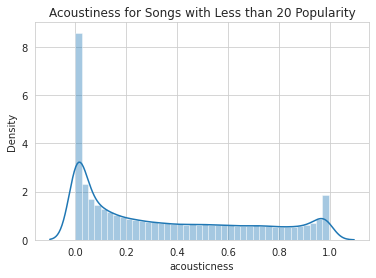

In [ ]:
#More prominent effect - with decrease in acousticness, song popularity is increasing
#To make sure of this, let us check the acousticness where popularity<50
#No8
popular_below_20 = data[data.song_popularity < 20]
sns.distplot(popular_below_20['acousticness'])
plt.title('Acoustiness for Songs with Less than 20 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 20 Popularity')

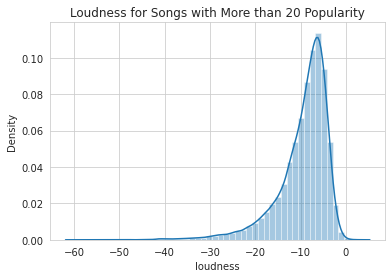

In [ ]:
#Hence, the effect is mutual and decrease in acousticness, on the whole, is leading to increase in popularity
#No9
sns.distplot(popular_above_20['loudness'])
plt.title('Loudness for Songs with More than 20 Popularity') 

Text(0.5, 1.0, 'Loudness for Songs with Less than 20 Popularity')

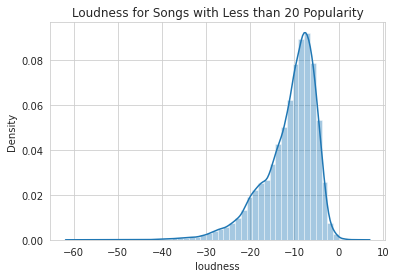

In [ ]:
#No10
sns.distplot(popular_below_20['loudness'])
plt.title('Loudness for Songs with Less than 20 Popularity')

In [ ]:
data.sample(5)

,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,valence
69116,409819,4rPw8VxacMn0gCqtRdJ9QN,Serene Danker - Live on WXPN,Flag Of Democracy,0,12-03-2013,2013.0,3.0,0.80800,0.267,120373,0.767,0.009,2,0.3180,-5.439,1,False,0.1540,109.749,4,169,0.1730
97153,254960,6gBpFgsNfKl3pOVzue7WrK,Let kallet bota,Labi,15,01-02-2016,2016.0,2.0,0.15800,0.811,174289,0.786,0.000,6,0.0505,-7.607,0,False,0.0853,104.986,4,170,0.9420
63054,403757,6I5Ryyb7F2CqEDJm7SD3yu,Evil Boy,Xkodex,0,29-08-2019,2019.0,8.0,0.00491,0.496,105900,0.996,0.924,6,0.3010,-2.808,0,False,0.1090,133.345,5,170,0.0624
131379,131378,0C1jPhLZZy0jX74xgOo9OX,JPP,Elder Island,32,08-02-2019,2019.0,2.0,0.39900,0.692,286745,0.433,0.462,10,0.1010,-11.547,1,False,0.0318,118.029,4,169,0.1710
101861,101860,5YLBkEgpKzkPJOu2JZd2Xo,Crash,Xuitcasecity,37,11-12-2020,2020.0,12.0,0.06140,0.808,132500,0.659,0.000,4,0.3500,-8.357,1,False,0.1480,90.020,4,170,0.7740


In [ ]:
#Since, there are no categorical variables, we do not need to do any of the encoding

In order to determine the best possible model, we will be using the following models for both training and testing. In the end, we will compare their respective accuracies on the basis of predictions, and the extent of fitting to determine the best possible model for this kind of data set that provides.

1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier
4. DecisionTreeClassifier
5. Support Vector Machines

Beides, for feature selection (relevant independendt variables), we will select only based on music theory, rather than those which are based on artists' or songs' information. Selected features would be - 

acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.

In [ ]:


features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence"]



The song_popularity, which is our target variable, lies in the range of 0-38. If we train the model as per this, over-fitting would happen. Therefore, it is better to normalize the target variable at first and convert it into binary values - 0 and 1. Therefore, we would scale the song_popularity on the following basis - 
if (song_popularity<20) - Scaled Value = 0
if (song_popularity>=20) - Scaled Value = 1

In [ ]:
data.loc[data['song_popularity'] < 20, 'song_popularity'] = 0 
data.loc[data['song_popularity'] >= 20, 'song_popularity'] = 1
data.loc[data['song_popularity'] == 1]

,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,valence
98816,98815,2vHUtPCxmosrKXxa1Mlana,"Anyplace, Anywhere, Anytime",Symphonity,1,30-09-2016,2016.0,9.0,0.00121,0.401,244800,0.944,0.000002,6,0.0758,-3.916,1,False,0.0882,169.956,4,169,0.4180
98817,98816,6S1PTPsFLb1slNd9jJVCfG,Falle,Yungmon,1,08-05-2020,2020.0,5.0,0.04980,0.613,137716,0.412,0.000000,6,0.1310,-13.880,0,True,0.0810,169.943,4,170,0.3460
98818,98817,7r4eHmVPgMaNgd9AHQRZdq,Tıkla,İsmail YK,1,27-04-2004,2004.0,4.0,0.18000,0.789,284667,0.815,0.000002,8,0.1340,-7.946,0,False,0.0603,100.027,4,170,0.8950
98819,98818,3NBckiwR0FKC6zK59EWAFe,These Days - Solo Piano Version,Alexis Ffrench,1,04-09-2020,2020.0,9.0,0.98900,0.536,168914,0.298,0.871000,9,0.1210,-19.303,0,False,0.0414,103.006,4,170,0.3930
98820,98819,3QT8S7ZBD5kfQX3aJ7Nb5Y,Forever Song,Alexis Ffrench,1,20-03-2020,2020.0,3.0,0.98700,0.264,208023,0.147,0.886000,2,0.1000,-16.366,1,False,0.0386,77.914,4,170,0.0779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157803,157802,7sEZdh8W3r7ttNivxifenR,For You,Morro,1,01-11-2017,2017.0,11.0,0.50800,0.793,185000,0.692,0.219000,11,0.3410,-5.242,0,False,0.0409,120.017,4,170,0.2480
157804,157803,0q3po3WGRioPdjAFdB393e,"Mi Tierra Es León, Gto",Gerardo Reyes,1,21-03-2007,2007.0,3.0,0.66300,0.386,161960,0.376,0.000000,10,0.2380,-9.895,1,False,0.0528,171.917,3,170,0.8800
157805,157804,4L2DL42jfs1pPxastWZ0lU,The Garden - Demo,PJ Harvey,1,29-01-2021,2021.0,1.0,0.64400,0.664,273293,0.236,0.783000,7,0.0650,-24.437,0,False,0.0448,145.638,4,170,0.3320
157806,157805,0mUd52uVlCBWVYgHxoJnlm,PJ,Jesse Woods,1,01-10-2009,2009.0,10.0,0.66800,0.649,150893,0.428,0.000007,6,0.1220,-8.300,1,False,0.0278,134.259,4,169,0.3570


We will be keeping 80% of the dataset as training data and rest 20% for testing.

In [ ]:
training = data.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['song_popularity']
X_test = data.drop(training.index)[features]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

We are using train test split to segment another validation dataset.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

We will be running the models on two types of dataset. One would be trained and tested with the normal values of song_popularity as provided, which might result in over-fitting. Another would be by providing binary values to song_popularity.

**1. Logistic Regression**

In [ ]:
Log_reg_Model = LogisticRegression()
Log_reg_Model.fit(X_train, y_train)
LR_Predict = Log_reg_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))


Accuracy: 0.6265742574257426


**2. Random Forest Classifier**

In [ ]:
RandomFC_Model = RandomForestClassifier()
RandomFC_Model.fit(X_train, y_train)
RFC_Predict = RandomFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))


Accuracy: 0.6811485148514852


**3. K-Nearest Neighbors Classifier**

In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.5872475247524752


**4. Decision Tree Classifier**

In [ ]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 0.6036039603960396


**5. Linear Support Vector Machines**

In [ ]:
training_LSVC = training.sample(10000)
X_train_LSVC = training_LSVC[features]
y_train_LSVC = training_LSVC['song_popularity']
X_test_LSVC = data.drop(training_LSVC.index)[features]
X_train_LSVC, X_valid_LSVC, y_train_LSVC, y_valid_LSVC = train_test_split(
    X_train_LSVC, y_train_LSVC, test_size = 0.2, random_state = 420)

In [ ]:
LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train_LSVC, y_train_LSVC)
LSVC_Predict = LSVC_Model.predict(X_valid_LSVC)
LSVC_Accuracy = accuracy_score(y_valid_LSVC, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy))

Accuracy: 0.5715


We can observe that Random Forest Regression modelling is best fitted with highest accuracy (68.11%) in our scenario. Therefore, in order to predict our target regressor, that is song_popularity, Random Forest Regression is the best available model.
Thank you!